In [22]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
pip install webdriver-manager

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
from selenium import webdriver

In [25]:
driver = webdriver.Chrome()

In [26]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import time
import pandas as pd

In [27]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time

# Setup
options = webdriver.ChromeOptions()
options.add_argument("--start-maximized")
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# All categories with correct product links
category_links = {
    "Mobiles": "https://www.croma.com/mobiles-smartphones/c/1",
    "Laptops": "https://www.croma.com/laptops/laptops/c/1111",
    "Televisions": "https://www.croma.com/televisions/c/63",
    "Refrigerators": "https://www.croma.com/home-appliances/refrigerators/c/5",
    "Air Conditioners": "https://www.croma.com/home-appliances/air-conditioners/c/3",
    "Washing Machines": "https://www.croma.com/home-appliances/washing-machines/c/4"
}

all_data = []

for category, url in category_links.items():
    print(f"\n Scraping {category}...")
    driver.get(url)
    time.sleep(5)

    # Scroll down to load content
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(4)

    products = driver.find_elements(By.CSS_SELECTOR, "li.product-item")
    print(f" {category}: {len(products)} products")

    for p in products:
        try:
            title = p.find_element(By.CSS_SELECTOR, "h3.product-title").text
        except:
            title = "N/A"

        # try multiple selectors for price
        try:
            price = p.find_element(By.CSS_SELECTOR, "span.new-price").text
        except:
            try:
                price = p.find_element(By.CSS_SELECTOR, "span.amount").text
            except:
                price = "N/A"

        try:
            link = p.find_element(By.TAG_NAME, "a").get_attribute("href")
        except:
            link = "N/A"

        all_data.append({
            "Category": category,
            "Title": title,
            "Price": price,
            "Link": link
        })

#  Close browser
driver.quit()

# Save to CSV
df = pd.DataFrame(all_data)
df.to_csv("croma_all_categories.csv", index=False)
print("\n Final data saved to croma_all_categories.csv")



 Scraping Mobiles...
 Mobiles: 21 products

 Scraping Laptops...
 Laptops: 1 products

 Scraping Televisions...
 Televisions: 11 products

 Scraping Refrigerators...
 Refrigerators: 21 products

 Scraping Air Conditioners...
 Air Conditioners: 21 products

 Scraping Washing Machines...
 Washing Machines: 1 products

 Final data saved to croma_all_categories.csv


#### Price Cleaning (remove ₹ and convert to number)

In [28]:
df.isnull().sum()

Category    0
Title       0
Price       0
Link        0
dtype: int64

In [29]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Category  76 non-null     str  
 1   Title     76 non-null     str  
 2   Price     76 non-null     str  
 3   Link      76 non-null     str  
dtypes: str(4)
memory usage: 19.2 KB


In [30]:
df.head(2)

,Category,Title,Price,Link
0,Mobiles,"vivo Y19s 5G (4GB RAM, 128GB, Titanium Silver)...","₹13,499",https://www.croma.com/vivo-y19s-5g-4gb-ram-128...
1,Mobiles,"vivo Y19s 5G (4GB RAM, 128GB, Majestic Green) ...","₹13,499",https://www.croma.com/vivo-y19s-5g-4gb-ram-128...


In [31]:
df = df[(df['Title'] != 'N/A') & (df['Price'] != 'N/A') & (df['Link'] != 'N/A')]
df.to_csv('croma_cleaned_products.csv' , index = False)
print(" Cleaned data saved to croma_cleaned_products.csv")

 Cleaned data saved to croma_cleaned_products.csv


In [32]:
import os 
print(os.getcwd())

C:\Users\Nidhi Dhameliya\Desktop\jupyter\Selenium-Mini-Project-main


In [33]:
df.info()

<class 'pandas.DataFrame'>
Index: 73 entries, 0 to 74
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Category  73 non-null     str  
 1   Title     73 non-null     str  
 2   Price     73 non-null     str  
 3   Link      73 non-null     str  
dtypes: str(4)
memory usage: 19.4 KB


In [34]:
df.isnull().sum()

Category    0
Title       0
Price       0
Link        0
dtype: int64

In [35]:
#Remove ₹ and commas (as string)

df['Price'] = df['Price'].str.replace('₹', '', regex=False)
df['Price'] = df['Price'].str.replace(',', '', regex=False)

In [36]:
df.head(1)

,Category,Title,Price,Link
0,Mobiles,"vivo Y19s 5G (4GB RAM, 128GB, Titanium Silver)...",13499,https://www.croma.com/vivo-y19s-5g-4gb-ram-128...


In [37]:
# string to integer
df['Price'] = df['Price'].astype(int)

In [38]:
# Average price by category
df.groupby('Category')['Price'].mean()

Category
Air Conditioners    104405.904762
Mobiles              43726.000000
Refrigerators        10287.809524
Televisions          48490.900000
Name: Price, dtype: float64

In [39]:
# Count of products per category
df['Category'].value_counts()

Category
Mobiles             21
Refrigerators       21
Air Conditioners    21
Televisions         10
Name: count, dtype: int64

In [40]:
# High price product per category
df.loc[df.groupby('Category')['Price'].idxmax()]

,Category,Title,Price,Link
74,Air Conditioners,"Apple MacBook Pro (16.2 inch, M3 Pro, 36GB, 51...",239994,https://www.croma.com/apple-macbook-pro-16-2-i...
8,Mobiles,"Apple iPhone 17 Pro (256GB, Silver)",134900,https://www.croma.com/apple-iphone-17-pro-256g...
42,Refrigerators,DAIKIN Premium Series 1.5 Ton 3 Star Inverter ...,35490,https://www.croma.com/daikin-premium-series-1-...
23,Televisions,SONY PlayStation 5 Slim 1TB SSD Gaming Console...,54990,https://www.croma.com/sony-playstation-5-slim-...


### Visualize with Matplotlib/Seaborn

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

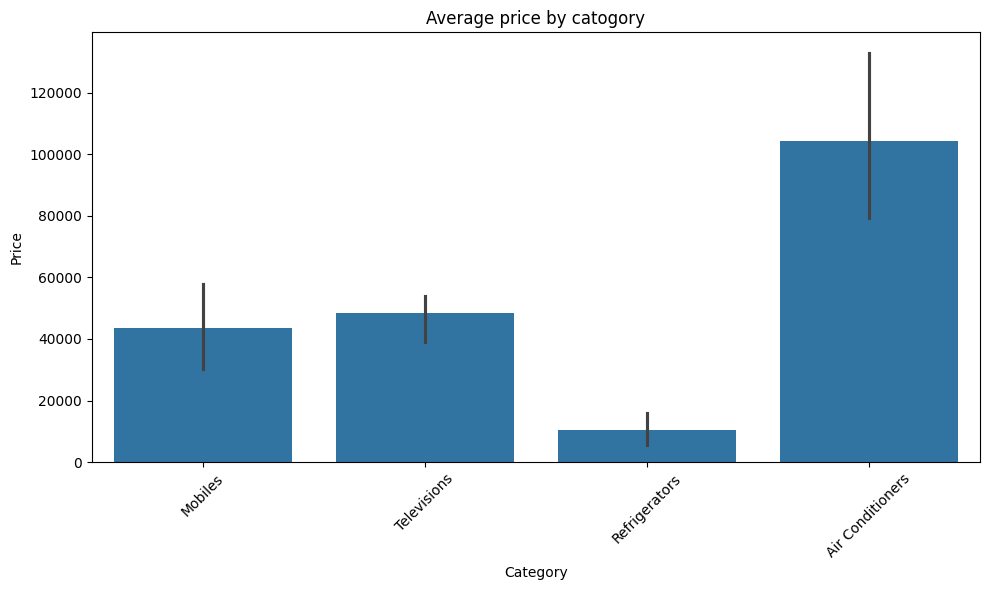

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Category',y='Price',estimator='mean')
plt.title('Average price by catogory')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()